# Homework Assignement Topic: Linear Regression

### In this assignment a data set of a collection of cars, (mtcars) will be used to explore the relationship between a set of variables and miles per gallon (MPG) and will attempt to create a linear regression model of fuel economy (mpg) for providing a informed decision on which car to buy.

#### Dataset: The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models). You will be provided the data set along with this file.

#### Loading the Required Modules & the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
data = pd.read_csv('./mtcars.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#### 1. Create separate plots of the mpg (miles per gallon) as the response, against each of disp, cyl and wt. Calculate the correlation between mpg and the three variables. Based on the correlation and plots, comment on which of these predictors seems most important?

<Figure size 1500x500 with 0 Axes>

<Axes: >

<Axes: xlabel='disp', ylabel='mpg'>

Text(0.5, 0, 'Displacement')

Text(0, 0.5, 'MPG')

<Axes: >

<Axes: xlabel='cyl', ylabel='mpg'>

Text(0.5, 0, 'Cylinders')

Text(0, 0.5, 'MPG')

<Axes: >

<Axes: xlabel='wt', ylabel='mpg'>

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'MPG')

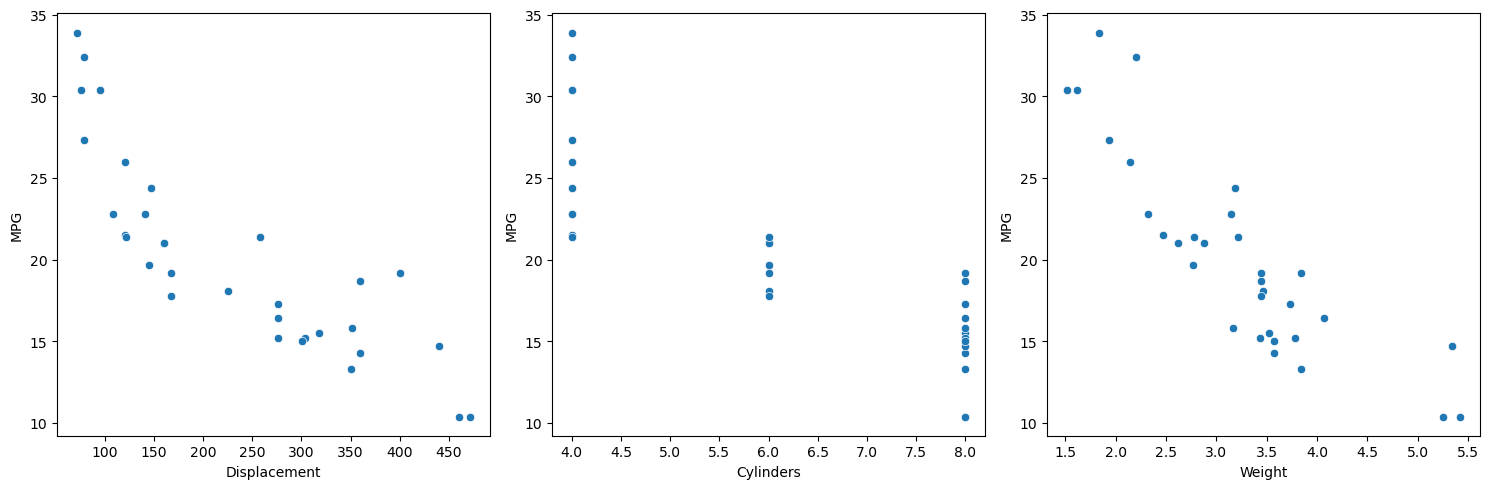

           mpg      disp       cyl        wt
mpg   1.000000 -0.847551 -0.852162 -0.867659
disp -0.847551  1.000000  0.902033  0.887980
cyl  -0.852162  0.902033  1.000000  0.782496
wt   -0.867659  0.887980  0.782496  1.000000


In [5]:
#your code Solution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='disp', y='mpg')
plt.xlabel('Displacement')
plt.ylabel('MPG')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='cyl', y='mpg')
plt.xlabel('Cylinders')
plt.ylabel('MPG')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='wt', y='mpg')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

# Calculate correlations
correlations = data[['mpg', 'disp', 'cyl', 'wt']].corr()
print(correlations)


####  2. Create a linear regression model that uses mpg as the response and the most correlated variable from (1) as predictor. Print out the summary result and answer the following:
 - what is the overall null hypothesis and what is the associated p-value? what do you conclude about H0?
 - What is the coefficient value and the 95% confidence interval on the coefficient associated with the predictor variable?
Be quantitative and specific.


In [7]:
#your code here
import statsmodels.api as sm
model = sm.OLS(data['mpg'], sm.add_constant(data['wt']))
results = model.fit()

# Print the summary result
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.29e-10
Time:                        07:36:28   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

#### 3. Again using the mtcars data, create a linear regression model that uses mpg as the response and both disp and wt score as predictors. Print out the summary result and compare with the results in (2). Based on the multivariate model:
 - Which predictor variables are significant and how did you determine this?
 - What are two assumptions one make's about residuals?
 - Create a plot of the residuals versus fitted values. Does the plot suggest that are assumptions are met? Why or why not?


In [9]:
#your code here
# Create the linear regression model with disp and wt as predictors
model_multivariate = sm.OLS(data['mpg'], sm.add_constant(data[['disp', 'wt']]))
results_multivariate = model_multivariate.fit()

# Print the summary result
print(results_multivariate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           2.74e-10
Time:                        07:38:16   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9606      2.165     16.151      0.0

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs Fitted Values')

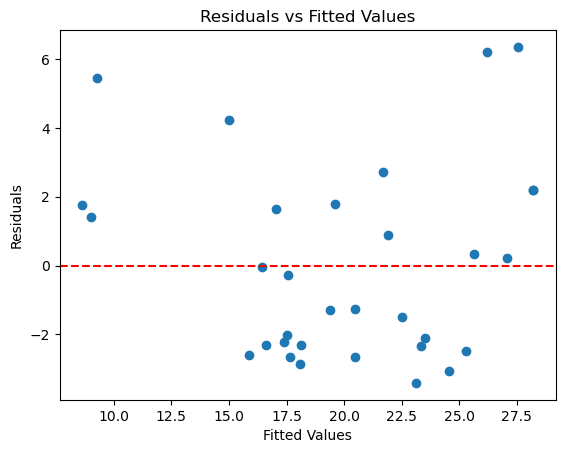

In [13]:
# Create a plot of residuals versus fitted values
fitted_values = results_multivariate.fittedvalues
residuals = results_multivariate.resid

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### 4. Now use the prediction model from the problem (3) above, predict the average mpg for a car with a weight of 3500 lbs and a displacement of 200 cu in.?

In [10]:
#your code here
weight = 3500
displacement = 200
predictors = [1, displacement, weight]
predicted_mpg = results_multivariate.predict(predictors)
print("Predicted average MPG:", predicted_mpg)

Predicted average MPG: [-11696.47306154]


#### 5. Consider cyl as an additional predictor for the above model in problem (3):

 - Create a plot of the number of cylinders, cyl as a predictor against mpg. Is cyl an important predictor?
 - Create a new model that uses cyl as an additional predictor variable (along with disp and wt) and print out summary result.
 - What does the cyl coefficient represent? Is cyl a continuous or categorical predictor? 
 - Does including cyl improve model fit? How would you know?

<Axes: xlabel='cyl', ylabel='mpg'>

Text(0.5, 0, 'Cylinders')

Text(0, 0.5, 'MPG')

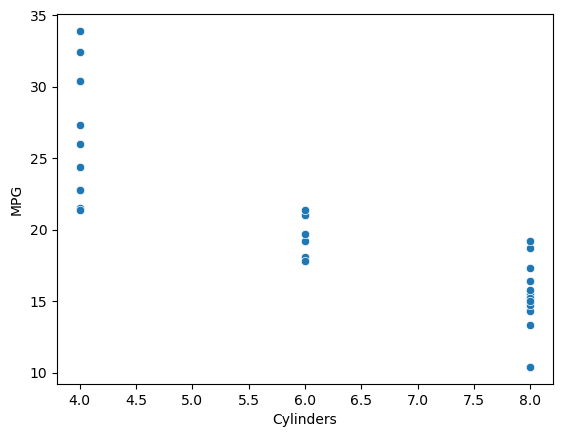

In [15]:
sns.scatterplot(data=data, x='cyl', y='mpg')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

In [12]:

model_additional_predictor = sm.OLS(data['mpg'], sm.add_constant(data[['disp', 'wt', 'cyl']]))
results_additional_predictor = model_additional_predictor.fit()

# Print the summary result
print(results_additional_predictor.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.42
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           5.40e-11
Time:                        07:38:52   Log-Likelihood:                -73.779
No. Observations:                  32   AIC:                             155.6
Df Residuals:                      28   BIC:                             161.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1077      2.842     14.462      0.0